In [1]:
# !pip install networkx
import networkx as nx

In [2]:
import numpy as np
import sys
sys.path.append('..')
from configuration import parse_input

In [3]:
from figure_2D import plot_undeployed_2D
from tools import get_center_position
import deploy_path as dp

In [4]:
def print_bumps_depressions(graph, bumps, depressions):
    print('\n--> bumps:')
    print(*[(b, graph.nodes[b]['height']) for b in bumps], sep='\n')
    print('\n--> depression:')
    print(*[(d, graph.nodes[d]['height']) for d in depressions], sep='\n')

### **Mesh Path**

In [5]:
from meshes_meta import saddle,  igloo_coarse,\
                        squid,   igloo,       \
                        peanut,  lilium,      \
                        hive,    trililium

In [6]:
mesh_path, nb_units = igloo_coarse

---

In [7]:
io, input_data, target_mesh, curr_um, plate_thickness_scaled, target_height_multiplier = parse_input(mesh_path, handleBoundary = False, isHex = False, use_target_surface = False)

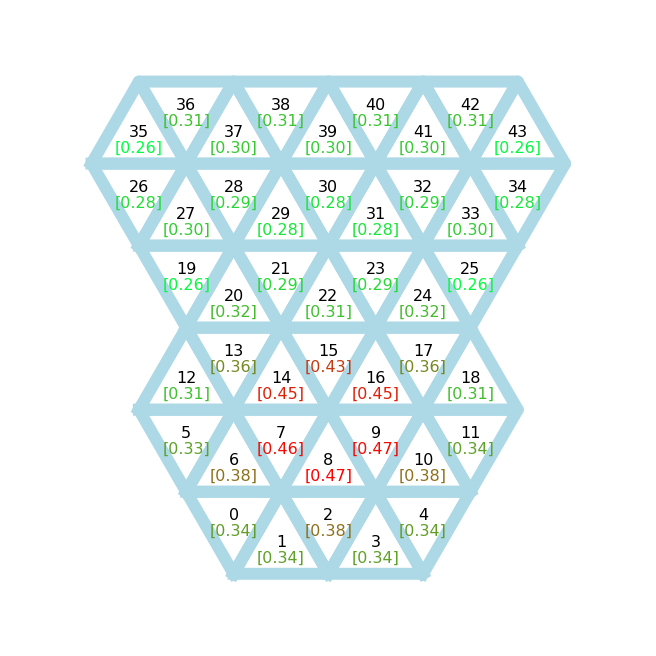

In [8]:
plot_undeployed_2D(input_data,
                   curr_um,
                   show_height=True,
                   show_plot=True)

In [9]:
connectivity = np.array(input_data['umbrella_connectivity'])
pos = get_center_position(curr_um)[:,:2]
graph = dp.create_graph(connectivity, curr_um)

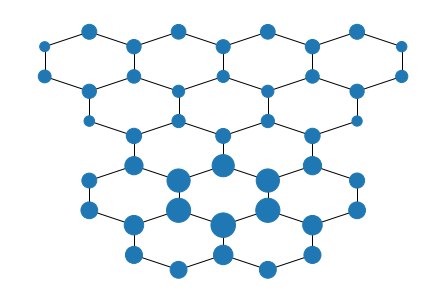

In [10]:
dp.draw_height(graph, pos, with_labels=False)

In [11]:
drop_extrems_at_boundary = False  # default False
drop_boudary             = False  # default False
surroundings             = True   # default True -> extrem not compare to direct neighbors, but rather compared to its surroundings

In [12]:
bumps, depressions = dp.find_extrems(graph, surroundings=surroundings, drop_extrems_at_boundary=drop_extrems_at_boundary, drop_boudary=drop_boudary)

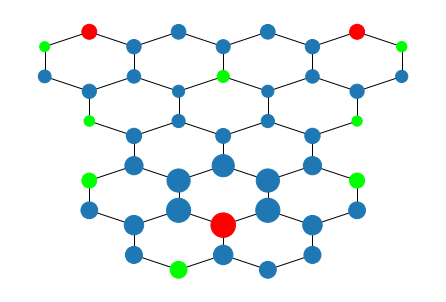


--> bumps:
(8, 0.47292058129815484)
(36, 0.3102689567803591)
(42, 0.3104627187079357)

--> depression:
(1, 0.3362830932850598)
(12, 0.30937773293600507)
(18, 0.31225379024410715)
(19, 0.2617097242585502)
(25, 0.25914135306916875)
(30, 0.2770967090889079)
(35, 0.25711808013794424)
(43, 0.2601877370509742)


In [13]:
# draw extrem points (bumps are red and depression are green)
dp.draw_height_extrems(graph, pos, bumps, depressions, with_labels=False)
print_bumps_depressions(graph, bumps, depressions)

In [14]:
depressions

[1, 12, 18, 19, 25, 30, 35, 43]

In [15]:
# raise NotImplementedError('stop `run all` here to select some depressions in next cell')

In [16]:
kept_depressions = depressions

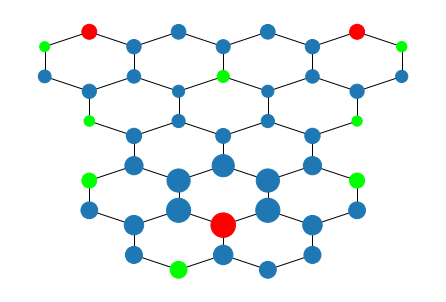

In [17]:
dp.draw_height_extrems(graph, pos, bumps, kept_depressions) # bumps:red | depression:green

In [18]:
force_smalest_dep = False # default False

In [ ]:
paths = dp.shortes_paths(graph, bumps, kept_depressions, force_smalest_dep=force_smalest_dep)

In [ ]:
print(f'[{[p0 for p in paths for p0 in p]}]')

In [ ]:
dp.draw_height_path(graph, pos, paths)

In [ ]:
# dp.surround_bumps(graph, bumps, level=10, verbose=True, pos=pos);

In [ ]:
# dp.surround_bumps(graph, [bumps[0]], level=10, verbose=True, pos=pos);

In [ ]:
# boundary = dp.get_boundary(graph)

In [ ]:
# dp.draw_height_extrems(graph, pos, boundary, [], with_labels=True)

In [ ]:
# dp.surround_bumps(graph, boundary, level=10, verbose=True, pos=pos);

In [ ]:
raise NotImplementedError("followings lines are developpment")

In [ ]:
def link_bumps(graph, bumps):
    if len(bumps)<2 : return []
    
    paths = {}
    for i,b_source in enumerate(bumps):
        paths[b] = []
        for b_target in bumps[i+1:]:
            paths[b].append(nx.shortest_path(graph,source=b_source,target=b_target, weight='weight'))
    